# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 

#### Question 2. Create a summary table

In [ ]:
#function

In [5]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [34]:
print 'GRE standard deviation is %s' % df_raw.gre.std()
print 'GRE mean is %s' % df_raw.gre.mean()
print 'The scaled GRE standard deviation is %s' % float(df_raw.gre.std()/800)+'\n'
print 'GPA mean is %s' % df_raw.gpa.std()
print 'GPA standard deviation is %s' % df_raw.gpa.std()
print 'The scaled GPA standard deviation is %s' % float(df_raw.gpa.std()/4.0)

GRE standard deviation is 115.628513092
GRE mean is 588.040201005
The scaled GRE standard deviation is 0.144535641364

GPA mean is 0.380630380057
GPA standard deviation is 0.380630380057
The scaled GPA standard deviation is 0.0951575950142


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The scale of GRE scores is from 0 - 800 while the scale of GPA scores is from 0 - 4.0.  The absoulte standard deviation of GREs is bound to be larger due to the difference in scale.  In percentage terms the GRE standard deviation is also higher (14% vs. 10%)

#### Question 4. Drop data points with missing data


In [42]:
df_raw.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [48]:
df_raw = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [49]:
df_raw.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

Answer: Assign df_raw to the prior dataframe with the rows with nulls dropped.  By running isnull().sum() on the new dataframe, I've confirmed that there are no null values in any of the rows of the new dataframe.

#### Question 6. Create box plots for GRE and GPA

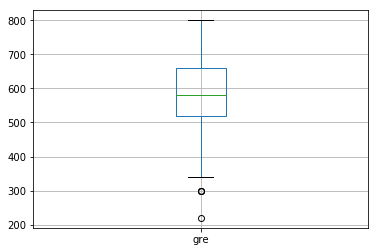

In [55]:
#boxplot 1
df_raw.boxplot(column='gre')

In [61]:
df_raw.gre.quantile([0.25,0.5,0.75])

0.25    520.0
0.50    580.0
0.75    660.0
Name: gre, dtype: float64

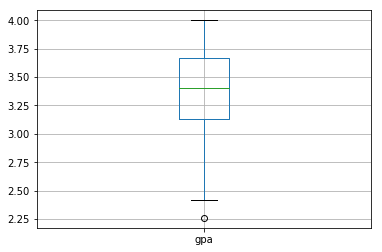

In [56]:
#boxplot 2 
df_raw.boxplot(column='gpa')

In [73]:
print df_raw.gpa.quantile([0.25,0.5,0.75])

0.25    3.13
0.50    3.40
0.75    3.67
Name: gpa, dtype: float64


In [70]:
print 'The max GPA is %s' % df_raw.gpa.max()
print 'The min GPA is %s' % df_raw.gpa.min()

The max GPA is 4.0
The min GPA is 2.26


In [72]:
print df_raw.gre.quantile([0.25,0.5,0.75])

0.25    520.0
0.50    580.0
0.75    660.0
Name: gre, dtype: float64


In [74]:
print 'The max GRE is %s' % df_raw.gre.max()
print 'The min GRE is %s' % df_raw.gre.min()

The max GRE is 800.0
The min GRE is 220.0


#### Question 7. What do this plots show?

Answer: The box plots show the max, 3rd quartile, median, 1st quartile, and min values of each column as the top whisker, top of box, middle of box, bottom of box, and bottom whisker respectively.

#### Question 8. Describe each distribution 

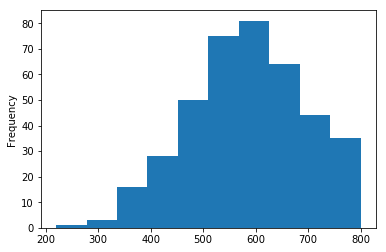

In [77]:
# plot the distribution of each variable 
#GRE distribution
df_raw.gre.plot.hist()

In [84]:
df_raw.gre.describe()

count    397.000000
mean     587.858942
std      115.717787
min      220.000000
25%      520.000000
50%      580.000000
75%      660.000000
max      800.000000
Name: gre, dtype: float64

In [87]:
print 'GRE skew is %s' % df_raw.gre.skew()
print 'GRE kurtosis is %s' % df_raw.gre.kurt()

GRE skew is -0.146046988216
GRE kurtosis is -0.332864354651


The GPA distribution has a mean of 587, a standard deviation of 116, is skewed to the left, and is less peaked than the normal distribution.

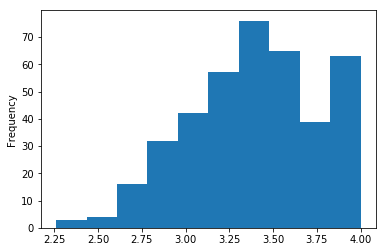

In [78]:
#GPA distribution
df_raw.gpa.plot.hist()

In [90]:
df_raw.gpa.describe()

count    397.000000
mean       3.392242
std        0.380208
min        2.260000
25%        3.130000
50%        3.400000
75%        3.670000
max        4.000000
Name: gpa, dtype: float64

In [89]:
print 'GPA skew is %s' % df_raw.gpa.skew()
print 'GPA kurtosis is %s' % df_raw.gpa.kurt()

GPA skew is -0.216888932969
GPA kurtosis is -0.563569899522


The GPA distribution has a mean 3.4, a standard deviation of 0.4, is skewed to the left, and is less peaked thn the standard distribution.

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

In [101]:
from scipy.stats import normaltest
normaltest(df_raw.gre)

NormaltestResult(statistic=3.8179829306094248, pvalue=0.14822980613776679)

In [102]:
normaltest(df_raw.gpa)

NormaltestResult(statistic=13.07987556091647, pvalue=0.0014445783772290991)

Answer: We cannot reject the null hypothesis that GRE follows a normal distribution (p = 15%) but we can reject that hypothesis for GPA since the p value is < 1%

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: I don't believe this dataset needs correction.  If we were to correct it, we would do so by aiming to remove any bias that we determined was present.  This would be done by adjusting results to compensate for what we observed was some unusual factor present in our sampleset. 

#### Question 11. Which of our variables are potentially colinear? 

In [103]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


We observe positive colinearity between GRE and Admit, GPA and Admit, and GRE and GPA.

#### Question 12. What did you find?

Answer: We are principally concerned with how our predictors correlate with Admit.  We've gound that GRE and GPA are positively correlated, with GRE being slightly more correlated.  Prestige is negatively correlated, meaning that the higher the undergrad prestige, the more likely a student is to be admitted.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Create three dummy variables for Prestige. Then perform a logistical regression on a dataframe containing columns 'Admit' and the three dummy variables created from Prestige ('Rank_1', 'Rank_2', and 'Rank_3').

#### Question 14. What is your hypothesis? 

Answer: 
Null hypothesis: There is no statistically significant relationship between grad school admission rates and prestige of undergraduate skills as determined by the 'Admit' and 'Prestige' fields.
Hypothesis: These is a statistically signicant negative correlation between 'Admit' and 'Prestige' meaning that student is more likely to be admitted if they graduated from a prestigious undergraduate school.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data